In [1]:
import onnx
import onnxruntime as ort
import numpy as np
from PIL import Image

In [14]:
ort_session = ort.InferenceSession('./models/super_resolution.onnx')
print(ort_session.get_inputs()[0])
img = Image.open("./images/cat12.jpg")
img_ycbcr = img.convert('YCbCr')
img_y, img_cb, img_cr = img_ycbcr.split()
input1 = np.expand_dims(np.expand_dims(np.array(img_y, dtype=np.float32),axis=0),axis=0)
ort_inputs = {
    "input": input1
}

NodeArg(name='input', type='tensor(float)', shape=['batch_size', 1, 224, 224])


In [12]:
img = Image.open("./images/cat12.jpg")
img.show()

In [13]:
img_y.show()

In [15]:
print(input.shape)
ort_output = ort_session.run(None, ort_inputs)[0]
print(ort_output)

(1, 1, 224, 224)
[[[[ 85.26776   96.1889    97.950745 ...  60.456985  53.493225
     48.827576]
   [ 91.801765 104.94471  114.154076 ...  76.39936   64.64097
     51.522198]
   [ 88.58896  112.46929  119.73324  ...  73.42519   70.44345
     56.582233]
   ...
   [164.08978  176.30872  180.70241  ... 132.82274  142.0181
    122.20652 ]
   [150.28302  145.61482  155.80362  ... 128.87021  125.5577
    113.13816 ]
   [123.35092  124.09978  129.80287  ...  93.67287  102.045685
    103.022385]]]]


In [16]:
ort_output.shape

(1, 1, 672, 672)

In [6]:
ort_output.shape

(1, 1, 672, 672)

In [26]:
np.max(ort_output[0,0,:,:])

230.67595

In [31]:
img_out_y = Image.fromarray(np.uint8((ort_output[0,0,:,:]).clip(0, 255)), mode='L')

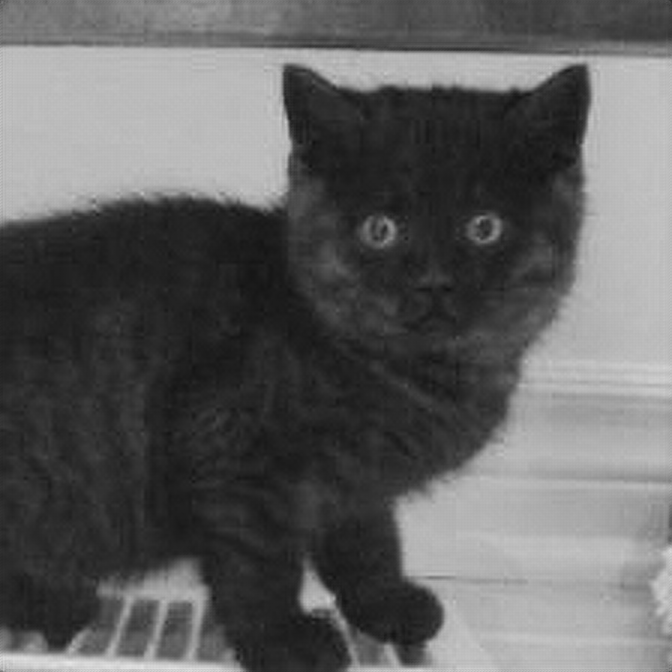

In [32]:
img_out_y

In [34]:
# get the output image follow post-processing step from PyTorch implementation
final_img = Image.merge(
    "YCbCr", [
        img_out_y,
        img_cb.resize(img_out_y.size, Image.BICUBIC),
        img_cr.resize(img_out_y.size, Image.BICUBIC),
    ]).convert("RGB")

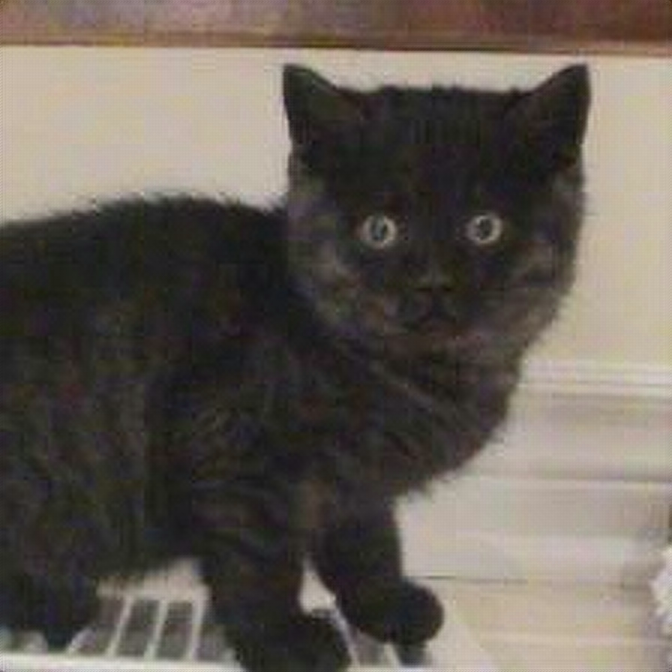

In [35]:
final_img

In [22]:
final_img.save("cat_superres_with_ort.jpg")